<a href="https://colab.research.google.com/github/Nareshedagotti/RAG/blob/main/Day_5_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Day 5: How RAG Retrieves the Right Info: Query Processing & Context Building**


Today, we're diving deep into the retrieval pipeline – the crucial process of taking a user's question and finding exactly the right pieces of information from our knowledge base. It's not just about finding any chunks; it's about finding the best ones to provide to our Language Model.

We'll unravel the step-by-step process, explore different retrieval methods, understand how to score and rank chunks, and address the critical issue of context length. Our goal is for you to understand not just what these methods are, but how they work behind the scenes and when to use them.

##### **The Core Retrieval Pipeline: From User Query to Top K Chunks**

At its heart, the retrieval pipeline is about converting your natural language question into a format that allows for efficient comparison with your knowledge base. Think of it like a highly skilled librarian who doesn't just look for keywords, but truly understands your intent.

#### **Step 1: User Query Understanding & Pre-processing**

When you ask a question, the RAG system first works to understand your intent and prepare the query for the most effective search.



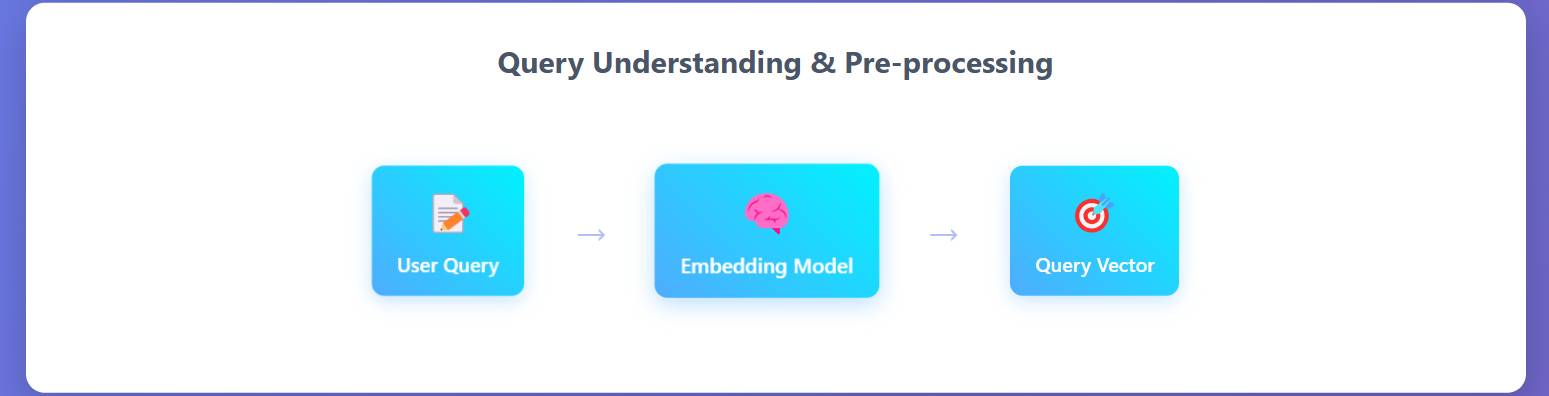

##### **A. User Query to Query Embedding (Dense Representation)**

When you ask a question like "What are the benefits of daily meditation?", the RAG system doesn't search for those words directly. Instead, it transforms your natural language query into a numerical vector – an embedding. This is a dense representation of your query's semantic meaning.

**How it works:** The same embedding model (from Day 3) that converted your knowledge base chunks into vectors is used here. It generates a high-dimensional vector that captures the semantic essence of your query.

**Why it's crucial:** This converts your human-readable question into a "language" that the vector database can understand and compare with the stored document chunks. It allows for semantic search, meaning you can find relevant information even if the exact keywords aren't present.

**Real-world example:** If your knowledge base has chunks about "mindfulness practices," "stress reduction techniques," and "improving focus," your query "What are the benefits of daily meditation?" will be embedded into a vector that is semantically close to these topics, even if the exact words "meditation" or "daily" aren't explicitly in all the chunks.

##### **B. Query Expansion / Rewriting (Optional, but Powerful)**
Sometimes, a user's initial query might be too short, ambiguous, or use terminology that isn't perfectly aligned with your knowledge base. This is where query expansion comes in.

**How it works:** An LLM can be used to generate several alternative versions of the original query. For example, if the query is "RAG benefits", the LLM might expand it to:

"What are the advantages of Retrieval Augmented Generation?"

"How does RAG improve LLM performance?"

"What are the use cases for RAG?"

**Why it's crucial:** By searching with multiple query variations, you significantly increase the chances of retrieving all relevant documents, even if they use different phrasing than the original query. This improves recall (the ability to find all relevant items).

**When to use it:** For complex queries, short queries, or when you suspect users might use diverse phrasing.


##### **C. Metadata Filtering (Leveraging Structured Information)**

If your documents have associated metadata (like author, date, department, product category, etc., as discussed in Day 2), you can use this to pre-filter or refine your search.

**How it works:** Before or during the vector search, you can apply filters based on metadata. For example, a query "latest company policies on remote work" could be filtered to only search documents from the "HR" department published "after 2023."

**Why it's crucial:** Metadata filtering narrows down the search space, making retrieval more precise and efficient. It's excellent for queries that have specific constraints beyond just semantic meaning.

**When to use it:** When your knowledge base has rich, structured metadata that can help constrain searches.

#### **Step 2: Vector Database Search & Top K Chunks**

Once your query (or its expanded versions) is an embedding, it's sent to the vector database.


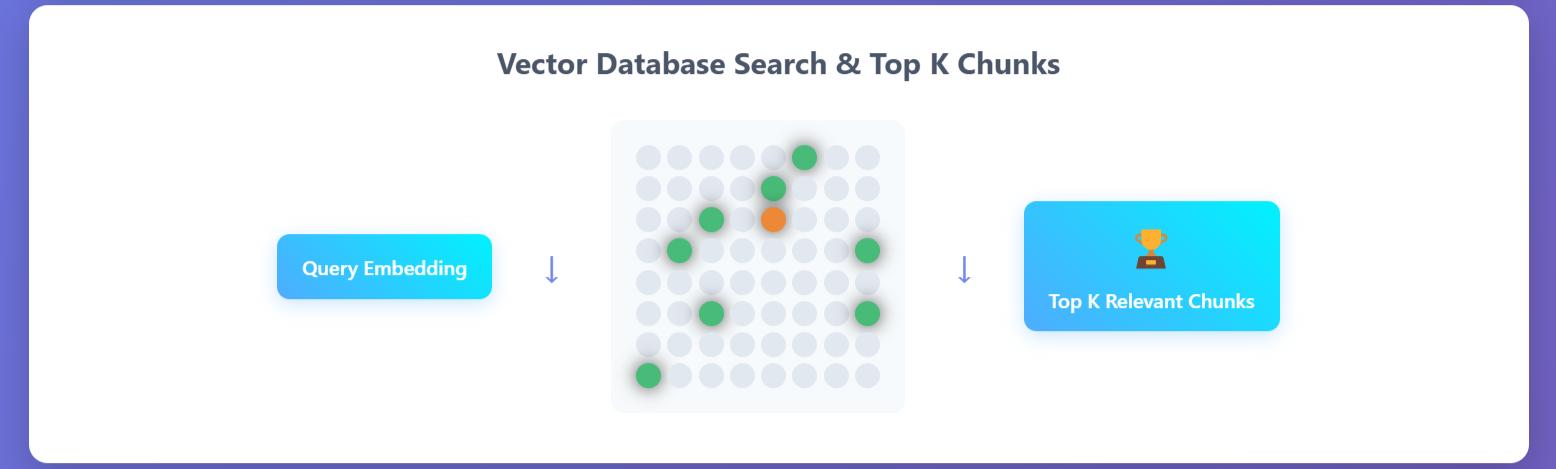

**How it works:** The vector database efficiently compares your query embedding with all the stored chunk embeddings. It calculates a "similarity score" (often using cosine similarity) between your query vector and every chunk vector. The higher the score, the more semantically similar the chunk is to your query.

**The "Top K" Concept:** The database then returns the k most similar chunks. k is a parameter you define, representing the number of top-scoring chunks you want to retrieve. This is the simplest form of dense retrieval.

**Real-world example:** You ask a travel RAG system: "What are the best places to visit in Kyoto during cherry blossom season?"

1. Your query is embedded into a dense vector (and potentially expanded).
2. The vector database finds k chunks that are most semantically similar. These might include chunks describing:
 * "Philosopher's Path in spring"
 * "Maruyama Park cherry blossoms"
 * "Kyoto's top temples for sakura viewing"
 * "Best time to visit Japan for cherry blossoms"

#### **Retrieval Methods: Top-K (Dense), Sparse, and Hybrid Approaches**

While top k vector similarity (dense retrieval) is foundational, it's not the only way to find relevant information. Different methods excel in different scenarios.



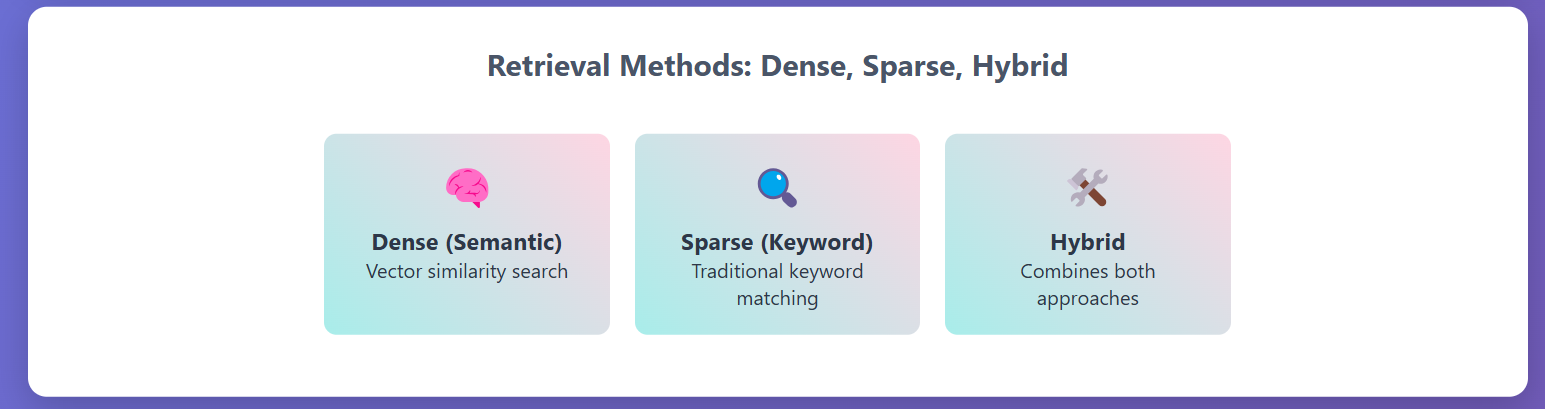

##### **1. Dense Retrieval (Vector Similarity / Top-K)**

**How it works:** As discussed above, this method relies on embeddings. Both the query and the documents are converted into dense vectors, and similarity is measured in the vector space.

**Pros:** Excellent for semantic understanding. It can find relevant documents even if they don't share keywords with the query, understanding the meaning behind the words. Great for conceptual questions.

**Cons:** Can struggle with very specific keyword matches (e.g., product IDs, error codes) or when the embedding model doesn't perfectly capture the nuance of a specific domain.

**Use Case:** General knowledge questions, conceptual queries, or when users might paraphrase their questions. Good for "What is X?" or "Explain Y."

##### **2. Sparse Retrieval (Keyword Search / Lexical Search)**

**How it works:** This is traditional text search. It focuses on keyword matching, typically using algorithms like TF-IDF (Term Frequency-Inverse Document Frequency) or BM25 (Best Match 25). These methods create sparse representations where only the presence or absence of specific words matters, often with weights.

**Pros:** Excellent for very specific terms, proper nouns, product IDs, error codes, or when you need exact matches. It's fast and doesn't rely on embedding models.

**Cons:** Fails on synonyms, paraphrasing, or conceptual understanding. It doesn't grasp the meaning behind the words.

**Use Case:** When users are likely to use precise, unambiguous terms, like searching a database of legal codes, product manuals by part number, or specific error messages. Good for "What is SKU-12345?" or "Error code 404 meaning."

##### **3. Hybrid Search: The Best of Both Worlds**

**How it works:** Combines the strengths of both dense (semantic) search and sparse (lexical) search. It runs both types of searches independently and then intelligently merges their results, often using a technique like Reciprocal Rank Fusion (RRF).

**Pros:** Offers the best of both worlds. It can understand the meaning of a query while also catching specific keywords. This leads to much more robust and accurate retrieval, improving both recall (finding all relevant items) and precision (ensuring found items are highly relevant).

**Cons:** More complex to implement as it requires managing two search types and merging their results.

**Use Case:** Most general-purpose RAG applications where queries can be both semantic ("explain quantum physics") and keyword-specific ("what is the formula for E=mc2?"). This is often the recommended approach for production systems.

**Which Method is Useful for Which Use Case?**

**Pure Dense (Top-K):** Good starting point for general-purpose RAG, especially if your data is highly conceptual and users ask open-ended questions. Simpler to implement initially.

**Pure Sparse (Keyword):** Ideal for highly structured data, specific lookups, or when exact keyword matches are paramount (e.g., searching a code repository for function names).

**Hybrid Search:** Highly recommended for most real-world RAG applications. It provides a robust solution that handles both semantic and lexical queries effectively, leading to superior user experience. When in doubt, start with Hybrid.


**Practical Implementation: Basic Retrieval Methods**

Let's implement these different retrieval approaches to see how they work in practice:


In [ ]:
import os
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import SentenceTransformerEmbeddings
from langchain_core.documents import Document
from langchain_community.retrievers import BM25Retriever
from langchain.retrievers import EnsembleRetriever

# Sample documents for our knowledge base
documents = [
    Document(page_content="Meditation is a practice where an individual uses techniques like mindfulness to train attention and awareness, achieving mental clarity and emotional stability.", metadata={"source": "health_blog"}),
    Document(page_content="The benefits of meditation include reduced stress, improved focus, emotional regulation, and enhanced self-awareness. It can be practiced in various forms.", metadata={"source": "wellness_guide"}),
    Document(page_content="Ibuprofen is a nonsteroidal anti-inflammatory drug (NSAID) used for pain relief. Common side effects include stomach upset, nausea, and heartburn.", metadata={"source": "medical_reference"}),
    Document(page_content="Regular exercise has numerous health benefits including improved cardiovascular health, increased muscle strength, and better mood regulation.", metadata={"source": "fitness_guide"}),
    Document(page_content="Product SKU-12345 is a wireless bluetooth headphone with noise cancellation features and 20-hour battery life.", metadata={"source": "product_catalog"}),
]

# Initialize embedding model
# This model converts text into numerical vectors (embeddings).
embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

# Create a FAISS vector store from our documents and embeddings.
# FAISS is a library for efficient similarity search and clustering of dense vectors.
vectorstore = FAISS.from_documents(documents, embeddings)

# 1. Dense Retrieval (Top-K) - Semantic Search
# This retriever uses the vector store to find semantically similar documents.
print("=== Dense Retrieval (Semantic Search) ===")
dense_retriever = vectorstore.as_retriever(search_kwargs={"k": 2}) # Retrieve top 2 semantically similar chunks

query = "What helps with stress and mental wellness?"
dense_results = dense_retriever.invoke(query)
print(f"Query: {query}")
for i, doc in enumerate(dense_results):
    print(f"  {i+1}. {doc.page_content[:100]}...") # Print first 100 characters of each retrieved document

# 2. Sparse Retrieval (Keyword Search) - Lexical Search
# This retriever uses BM25 algorithm for keyword-based search.
print("\n=== Sparse Retrieval (Keyword Search) ===")
bm25_retriever = BM25Retriever.from_documents(documents)
bm25_retriever.k = 2 # Retrieve top 2 keyword-matched chunks

query = "SKU-12345 bluetooth headphone"
sparse_results = bm25_retriever.invoke(query)
print(f"Query: {query}")
for i, doc in enumerate(sparse_results):
    print(f"  {i+1}. {doc.page_content[:100]}...")

# 3. Hybrid Search - Combines Dense and Sparse Retrieval
# EnsembleRetriever combines results from multiple retrievers.
# Weights determine the importance of each retriever's results.
print("\n=== Hybrid Search (Dense + Sparse) ===")
ensemble_retriever = EnsembleRetriever(
    retrievers=[dense_retriever, bm25_retriever],
    weights=[0.6, 0.4]  # Favor semantic search slightly (60% weight for dense, 40% for sparse)
)

query = "side effects of pain medication"
hybrid_results = ensemble_retriever.invoke(query)
print(f"Query: {query}")
for i, doc in enumerate(hybrid_results):
    print(f"  {i+1}. {doc.page_content[:100]}...")


### **Beyond Top-K: Ranking and Re-ranking for Precision**

While initial retrieval (dense, sparse, or hybrid) gives us a set of potentially relevant chunks, it's often not enough. The initial ranking might bring up chunks that are related but not directly relevant to your specific intent, or it might order them poorly. This is where ranking and re-ranking come in to refine the order and ensure the most pertinent information is at the very top.

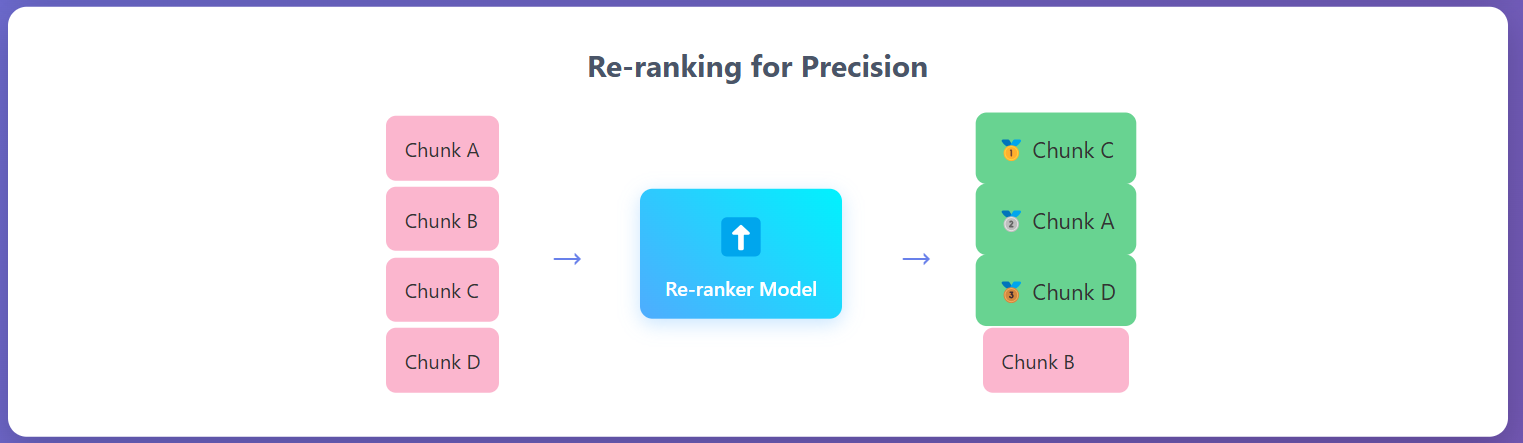


##### **Why Initial Top-K Isn't Always Perfect**

Consider our Kyoto example. The initial top k might return chunks about general Kyoto attractions, or cherry blossoms in other cities, mixed in with truly relevant ones. We need a way to refine this list.

##### **Re-ranking: Refining the Order**
Re-ranking is the process of taking the initially retrieved top k chunks and re-evaluating their relevance to the original query, often using a more sophisticated model or method. This helps ensure the most pertinent information is at the very top.

##### **Cross-encoders/Re-rankers:**
**How it works:** These are specialized, often smaller, language models designed to take a query and a document (or chunk) pair and output a single relevance score. Unlike embedding models (which generate independent vectors for comparison), cross-encoders consider the query and document together to understand their relationship and context.

**Benefit:** They are much better at discerning fine-grained relevance and context than simple vector similarity. They can identify subtle connections or irrelevancies.

**Trade-off:** They are more computationally expensive because they process each query-chunk pair, meaning they are typically applied to a smaller set of already retrieved top k documents (e.g., the top 50-100 from the initial retrieval).

**Example:** After retrieving 20 chunks about Kyoto, a re-ranker might score "Philosopher's Path in spring" higher than "General history of Kyoto" for the "cherry blossom" query because it understands the direct relevance of "spring" to "cherry blossom season" when both are considered together.

##### **Reciprocal Rank Fusion (RRF):**
**How it works:** RRF is a method to combine the rankings from multiple different retrieval methods (e.g., vector search and keyword search) into a single, robust final ranking. It assigns a score based on the rank of a document in each individual list. Documents that appear high in multiple lists get a significantly boosted score.

**Benefit:** It leverages the strengths of different retrieval approaches, making the overall retrieval more resilient and accurate, especially in hybrid search scenarios.

**Contextual Re-ranking:**
How it works: Instead of just scoring individual chunks, some advanced re-ranking considers how chunks relate to each other or if they collectively answer the query better. This might involve looking for redundancy or complementarity among the retrieved chunks.

**Real-world example:** You search for "What are the side effects of ibuprofen?"
* Initial Top-K: Might retrieve chunks about ibuprofen dosage, general pain relief, and even a chunk about acetaminophen side effects (due to semantic similarity in "pain medication").
* Re-ranking: A cross-encoder would analyze each chunk with your specific query. It would likely score the chunk detailing "common side effects of ibuprofen" much higher than the one about acetaminophen, pushing it to the top of the list for the LLM.


### **Practical Implementation: Re-ranking**
Here's how you can implement basic re-ranking in your retrieval pipeline. Note that SimpleReRanker here is a conceptual example; in a real-world scenario, you would integrate with a powerful re-ranking model like Cohere Rerank or a fine-tuned cross-encoder.


In [ ]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import DocumentCompressor
import re

class SimpleReRanker(DocumentCompressor):
    """
    A simple re-ranker that scores documents based on query-specific heuristics.
    In production, you'd typically use models like Cohere Rerank or similar cross-encoders
    that have been trained to understand relevance. This is a simplified illustrative example.
    """

    def compress_documents(self, documents, query, callbacks=None):
        print(f"Re-ranking {len(documents)} documents for query: '{query}'")

        # Simple scoring based on keyword overlap and relevance indicators
        scored_docs = []
        query_lower = query.lower()

        for doc in documents:
            score = 0
            content_lower = doc.page_content.lower()

            # Score based on exact keyword matches
            query_words = set(query_lower.split())
            content_words = set(content_lower.split())
            keyword_overlap = len(query_words.intersection(content_words))
            score += keyword_overlap * 2 # Give more weight to direct keyword overlap

            # Bonus for specific terms that indicate direct relevance
            if "side effects" in query_lower and "side effects" in content_lower:
                score += 5 # High bonus if both query and document mention "side effects"
            if "benefits" in query_lower and "benefits" in content_lower:
                score += 5 # High bonus if both query and document mention "benefits"

            # Length penalty for very long documents (prefer concise answers unless specified)
            # This helps to prioritize shorter, more to-the-point documents.
            if len(doc.page_content) > 500:
                score -= 1

            scored_docs.append((doc, score))

        # Sort documents by their calculated score in descending order
        scored_docs.sort(key=lambda x: x[1], reverse=True)
        re_ranked = [doc for doc, score in scored_docs] # Extract just the documents

        print(f"Re-ranking complete. Scores: {[score for _, score in scored_docs]}")
        return re_ranked

# Create a compression retriever that first retrieves using the ensemble_retriever
# and then passes the results through our SimpleReRanker for re-ordering.
reranker = SimpleReRanker()
compression_retriever = ContextualCompressionRetriever(
    base_compressor=reranker, # The re-ranker to apply
    base_retriever=ensemble_retriever # The initial retriever (e.g., hybrid search)
)

# Test re-ranking
print("=== Re-ranked Results ===")
query = "What are the benefits of meditation for stress?"
reranked_results = compression_retriever.invoke(query)
print(f"Query: {query}")
for i, doc in enumerate(reranked_results):
    print(f"  {i+1}. {doc.page_content[:100]}...")

### **Chunk Scoring, Relevance, and Context Length Limitations**

##### **Chunk Scoring: Quantifying Relevance**

**Similarity Scores:** The initial score from the vector database (e.g., cosine similarity) tells us how close the vectors are. This is a raw measure of semantic proximity.

**Re-ranker Scores:** If you use a re-ranker, it provides a more nuanced score indicating how relevant a chunk is to the query. These scores are often calibrated to represent a more direct measure of relevance.

**Thresholding:** You might set a minimum score threshold. Chunks below this threshold are discarded, even if they were in the top k, because they might not be relevant enough to be included in the LLM's context. This helps filter out noise and improve precision (ensuring found items are highly relevant).

##### **Relevance: What Makes a Chunk "Good"?**

A relevant chunk is one that:

1. **Directly answers the user's query** or provides essential context.
2. **Is semantically aligned** with the query's intent.
3. **Is concise** and avoids unnecessary verbosity, focusing on the core information.
4. **Is from a credible source** (if your knowledge base tracks source metadata).
5. **Is up-to-date** (if recency is a factor for your data).
6. **Avoids redundancy** with other retrieved chunks.

**The Big Problem: Too Many Chunks = LLM Context Overflow!**

This is one of the most critical aspects to understand. Large Language Models (LLMs) have a finite "context window" – a limit on how much text (tokens) they can process at one time. This limit varies by model (e.g., 4k, 8k, 32k, 128k, or even larger tokens).


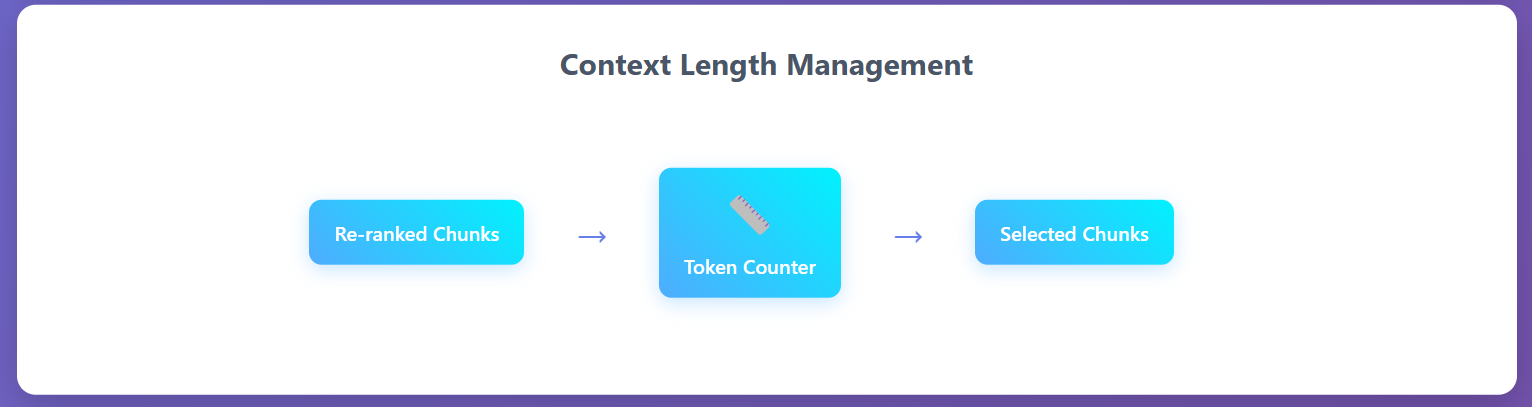

The Problem: If you retrieve too many chunks (even if some are relevant) and shove them all into the LLM's context:

* **Truncation:** The LLM might simply cut off the end of your input if it exceeds its context window, potentially losing crucial information needed for a complete answer.
* **Dilution:** The truly important information gets buried amidst less relevant or redundant text, making it harder for the LLM to identify the core answer. This is often called the "needle in a haystack" problem – the LLM might struggle to find the key facts among a sea of text.
* **Increased Latency & Cost:** More tokens mean more processing time for the LLM and higher API costs (if using paid models).
* **Hallucination/Confusion:** The LLM might get confused by conflicting or overwhelming information, leading to less accurate or even fabricated responses, as it tries to make sense of too much input.

**The Solution:**

The goal of retrieval is not just to find similar chunks, but to find the **most concise and relevant set of chunks** that fit within the LLM's context window and provide the best possible answer. This often involves careful k selection, aggressive re-ranking, and sometimes even summarizing the retrieved chunks before passing them to the LLM.

### **Evaluating Retrieval Performance (How do you know it's good?)**
When "working in this," it's crucial to measure if your retrieval pipeline is actually effective. Here are some common metrics:

* **Recall@K:** What percentage of truly relevant documents are found within the top K retrieved results? Higher is better.
* **Precision@K:** Out of the top K retrieved results, what percentage are actually relevant? Higher is better.
* **Mean Reciprocal Rank (MRR):** For a set of queries, if the first relevant document is at rank r, its reciprocal rank is 1/r. MRR is the average of these reciprocal ranks. It penalizes relevant documents appearing lower in the list. Higher is better.
* **Normalized Discounted Cumulative Gain (NDCG):** A more sophisticated metric that considers the graded relevance of documents (e.g., highly relevant, moderately relevant, not relevant) and their position in the ranked list. Highly relevant documents at the top contribute more.

To use these, you need a "ground truth" dataset where human annotators have marked which documents are relevant for specific queries.

### **Advanced Retrieval Strategies (Preview)**
While we've covered the core retrieval methods, there are several advanced strategies worth mentioning for even more robust RAG systems:

**Multi-Query Retrieval**

Generate multiple variations of the user's query using an LLM, then retrieve documents for each variation and combine results. This increases recall by capturing different ways to express the same information need.

**Parent Document Retrieval**

Create small "child" chunks for precise retrieval but return larger "parent" documents to provide more context. This balances retrieval precision with context richness.

**Self-Querying Retrieval**

Use an LLM to analyze the user's query and extract metadata filters (date, author, topic) to apply during retrieval, making searches more targeted.

**HyDE (Hypothetical Document Embeddings)**

Generate a hypothetical answer to the user's query using an LLM, then embed this hypothetical answer and use its embedding to search the vector database. This can sometimes lead to better semantic matches.

### **Key Takeaways for Day 5**
1. **The retrieval pipeline** is a multi-step process that transforms natural language queries into precise searches.
2. **Query pre-processing** (embedding, expansion, metadata filtering) is vital for effective retrieval.
3. **Different retrieval methods** (dense, sparse, hybrid) serve different use cases; **hybrid search is often the best default** for real-world applications.
4. **Re-ranking is crucial** for ensuring the most relevant chunks bubble to the top of the retrieved list, improving precision.
5. **Context length management** is critical – more chunks isn't always better; you must fit within the LLM's limits to avoid dilution and truncation.
6. **Evaluating retrieval performance** using metrics like Recall@K and Precision@K is essential for building effective RAG systems.

Tomorrow, we'll explore **Day 6: Generation** - how LLMs use your carefully retrieved context to generate accurate, helpful responses, and how to optimize the generation process for the best user experience.
